Dataset Overview:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-nu

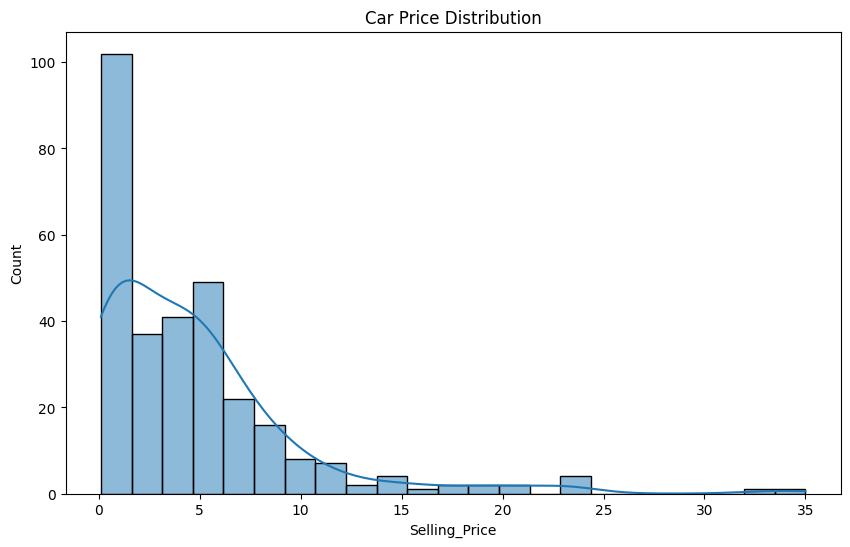

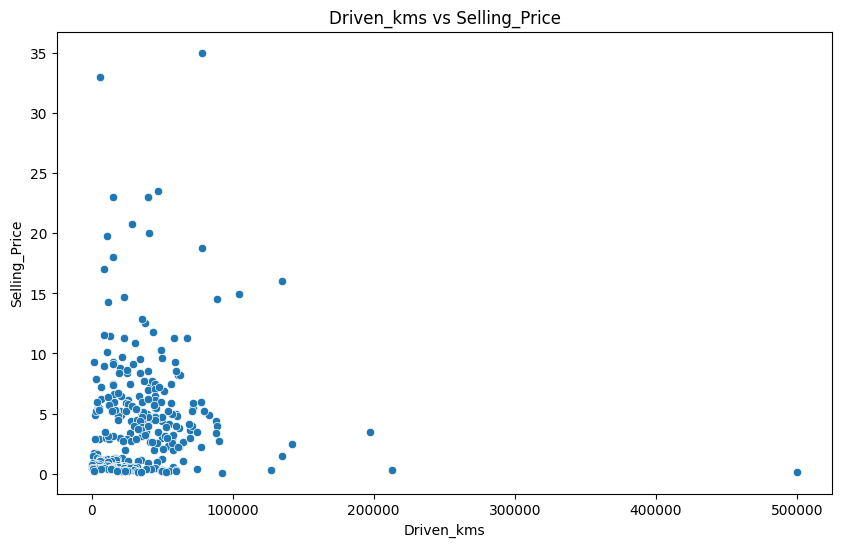

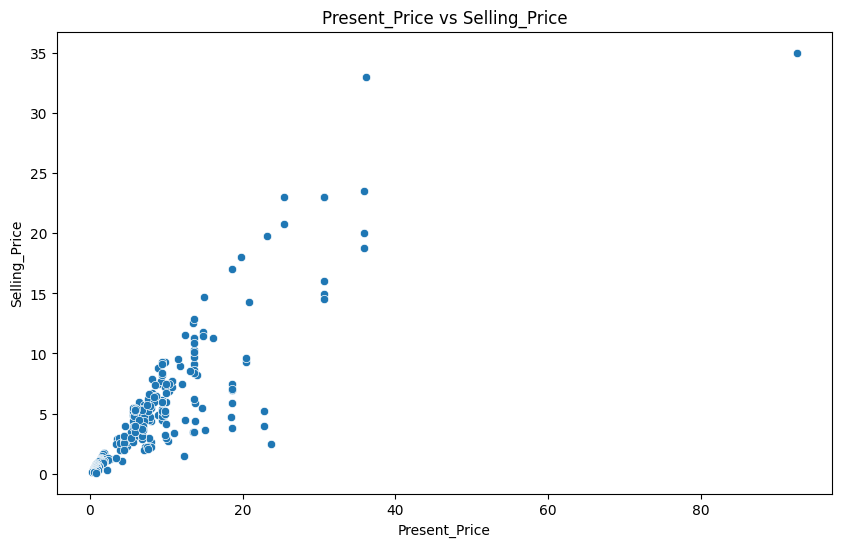


Model Performance Comparison:

          Linear Regression  Decision Tree  Random Forest
MAE                1.216374       0.694754       0.612170
RMSE               1.865838       1.089638       0.935415
R2 Score           0.848871       0.948458       0.962015

Best Model: Random Forest


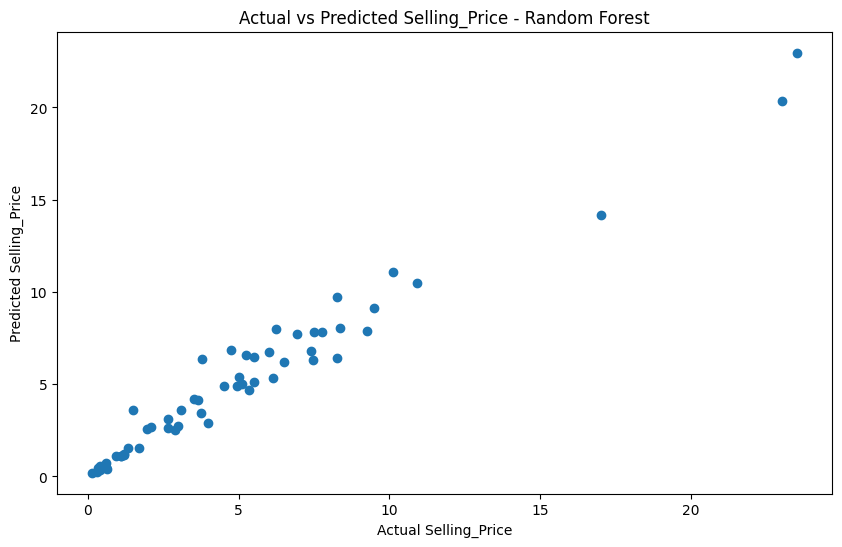

In [3]:
# -------------------------------------------------------------------------
# CAR PRICE PREDICTION USING MACHINE LEARNING (FULL PROJECT)
# -------------------------------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------------------------------------------------------
# Step 2: Load Dataset
# Replace with your dataset name (CSV file)
df = pd.read_csv("/content/car data.csv")

print("Dataset Overview:\n", df.head())
print("\nDataset Info:\n")
df.info()

# -------------------------------------------------------------------------
# Step 3: Handle Missing Values
df = df.dropna()  # or df.fillna(df.mean()), depending on dataset

# -------------------------------------------------------------------------
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Car Price Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')
plt.title("Driven_kms vs Selling_Price")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price')
plt.title("Present_Price vs Selling_Price")
plt.show()

# -------------------------------------------------------------------------
# Step 5: Select Features & Target
# Example features (edit based on your dataset):
# Brand, Model, Mileage, Horsepower, EngineSize, Age

target = "Selling_Price"
features = [col for col in df.columns if col != target and col != 'Car_Name']

X = df[features]
y = df[target]

# Separate categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# -------------------------------------------------------------------------
# Step 6: Preprocessing Pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# -------------------------------------------------------------------------
# Step 7: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------------------------------------------------
# Step 8: Train Multiple Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = {}

for model_name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results[model_name] = [mae, rmse, r2]

# -------------------------------------------------------------------------
# Step 9: Show Model Results
results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R2 Score'])
print("\nModel Performance Comparison:\n")
print(results_df)

# -------------------------------------------------------------------------
# Step 10: Best Model Prediction Plot
best_model = max(results, key=lambda m: results[m][2])  # Highest R2 Score

print(f"\nBest Model: {best_model}")

pipe_best = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', models[best_model])])

pipe_best.fit(X_train, y_train)
y_pred_best = pipe_best.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Selling_Price")
plt.ylabel("Predicted Selling_Price")
plt.title(f"Actual vs Predicted Selling_Price - {best_model}")
plt.show()

# -------------------------------------------------------------------------
# END OF CAR PRICE PREDICTION PROJECT
# -------------------------------------------------------------------------
